In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder



In [19]:
inputfile = '../data/test/mexico_k_1_layers_5.csv'
profile_file = '../data/profiles.csv'

score = []
max_clusters = 31

def get_data():
    profiles_file = pd.read_csv(profile_file)
    profiles_file = profiles_file[['profile_id', 'cwrb_reference_soil_group']]
    data = pd.read_csv(inputfile)
    data = profiles_file.merge(data, how="inner", left_on=[
        'profile_id'], right_on=['profile_id'])

    data = remove_small_classes(data, 15)
    
    y = data.cwrb_reference_soil_group.astype(str)
    X = data.drop(['cwrb_reference_soil_group'], axis=1)

    return X, y, data

def remove_small_classes(df, min):
    uniques = df.cwrb_reference_soil_group.unique()
    for u in uniques:
        cnt = df[df.cwrb_reference_soil_group == u].shape[0]
        if cnt < min:
            df = df[df.cwrb_reference_soil_group != u]
            print('Deleting {} with {} occurrences'.format(u, cnt))

    return df


def remove_outliers(data):
    print("Removing outliers")
    data = data[data.lower_depth_4 < 15]
    return data


In [20]:

X, y, data = get_data()
X = X.drop(['profile_id', 'latitude', 'longitude'], axis=1)



''' 
For class only
#data = data[data['cwrb_reference_soil_group'] == 'Regosols']
#X = data.drop(['cwrb_reference_soil_group', 'latitude', 'longitude', 'profile_id'], axis=1)


# For with class
X = data.drop(['latitude', 'longitude', 'profile_id'], axis=1)
# must be one hot encoded
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(X['cwrb_reference_soil_group'].values.reshape(-1, 1))
X['cwrb_reference_soil_group'] = onehot_encoded
'''

Deleting Plinthosols with 6 occurrences
Deleting Histosols with 10 occurrences


" \nFor class only\n#data = data[data['cwrb_reference_soil_group'] == 'Regosols']\n#X = data.drop(['cwrb_reference_soil_group', 'latitude', 'longitude', 'profile_id'], axis=1)\n\n\n# For with class\nX = data.drop(['latitude', 'longitude', 'profile_id'], axis=1)\n# must be one hot encoded\nonehot_encoder = OneHotEncoder(sparse=False)\nonehot_encoded = onehot_encoder.fit_transform(X['cwrb_reference_soil_group'].values.reshape(-1, 1))\nX['cwrb_reference_soil_group'] = onehot_encoded\n"

# Elbow

In [21]:
# Calculate
for cluster in range(1, max_clusters):
    print(f'Testing k = {cluster}')
    kmeans = KMeans(n_clusters=cluster, init="k-means++")
    kmeans.fit(X)
    score.append(kmeans.inertia_)


Testing k = 1
Testing k = 2
Testing k = 3
Testing k = 4
Testing k = 5
Testing k = 6
Testing k = 7
Testing k = 8
Testing k = 9
Testing k = 10
Testing k = 11
Testing k = 12
Testing k = 13
Testing k = 14
Testing k = 15
Testing k = 16
Testing k = 17
Testing k = 18
Testing k = 19
Testing k = 20
Testing k = 21
Testing k = 22
Testing k = 23
Testing k = 24
Testing k = 25
Testing k = 26
Testing k = 27
Testing k = 28
Testing k = 29
Testing k = 30


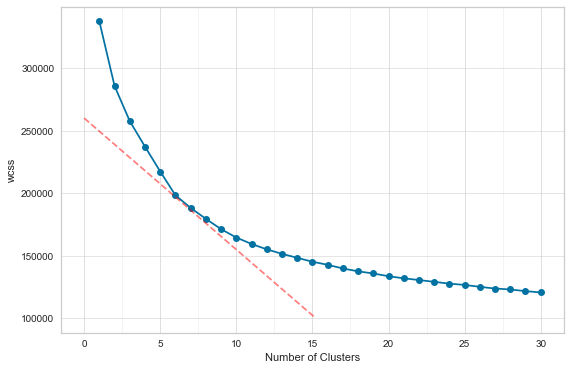

In [62]:
# Plot
plt.figure(figsize=(9,6))
fig = plt.plot(range(1, max_clusters), score, '-bo')
ax = plt.gca()
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')

major_ticks = np.arange(0, 31, 5)
minor_ticks = np.arange(0, 31, 2.5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

x1, y1 = [0, 15.2], [260000, 100000]
x2, y2 = [1, 10], [3, 2]
plt.plot(x1,y1, linestyle='--', color='red', alpha=0.5)
plt.savefig('elbow_method.pdf')

# Elbow with Distortion
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

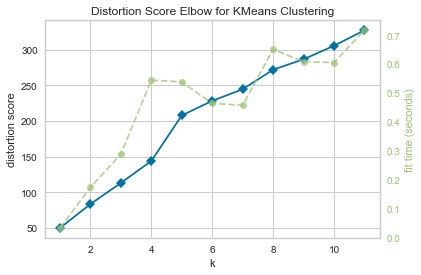

In [6]:
visualizer = KElbowVisualizer(KMeans(), k=(1,12))
visualizer.fit(X)  # Fit the training data to the visualizer
visualizer.poof()

# Silhouette and Intercluster Distance for k=5

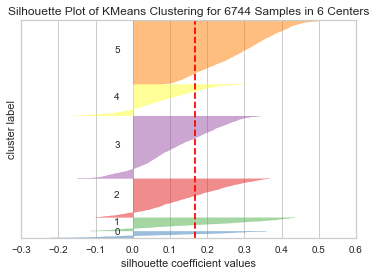

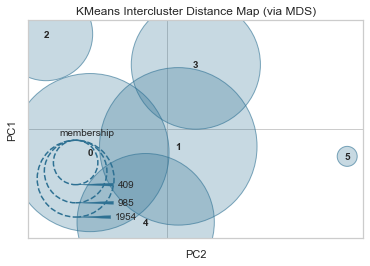

In [7]:
model = KMeans(n_clusters=6, init="k-means++")


visualizer = SilhouetteVisualizer(model)
visualizer.fit(X)  # Fit the training data to the visualizer
visualizer.poof()

visualizer = InterclusterDistance(model)
visualizer.fit(X)  # Fit the training data to the visualizer
visualizer.poof()

# Silhouette and Intercluster Distance for k=10

### Intercluster distance:
Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

'\nvisualizer = InterclusterDistance(model)\nvisualizer.fit(X)  # Fit the training data to the visualizer\nvisualizer.poof()\n'

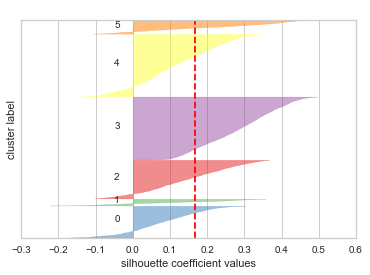

In [63]:
model = KMeans(n_clusters=6, init="k-means++")


visualizer = SilhouetteVisualizer(model, title=' ')
visualizer.fit(X)  # Fit the training data to the visualizer
visualizer.poof(outpath="silhouette_6.pdf")
'''
visualizer = InterclusterDistance(model)
visualizer.fit(X)  # Fit the training data to the visualizer
visualizer.poof()
'''

For n_clusters = 3 The average silhouette_score is : 0.1472007046457654
For n_clusters = 4 The average silhouette_score is : 0.1548526370855933
For n_clusters = 5 The average silhouette_score is : 0.1615593085831669
For n_clusters = 6 The average silhouette_score is : 0.1683088108190552
For n_clusters = 7 The average silhouette_score is : 0.1638372611421263
For n_clusters = 8 The average silhouette_score is : 0.16567648169010024
For n_clusters = 9 The average silhouette_score is : 0.14374581641321324
For n_clusters = 10 The average silhouette_score is : 0.14002414389247395


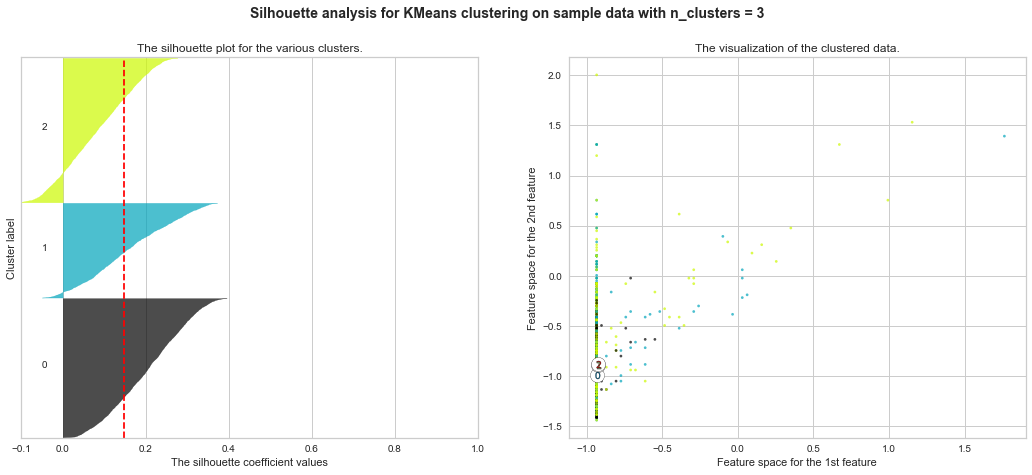

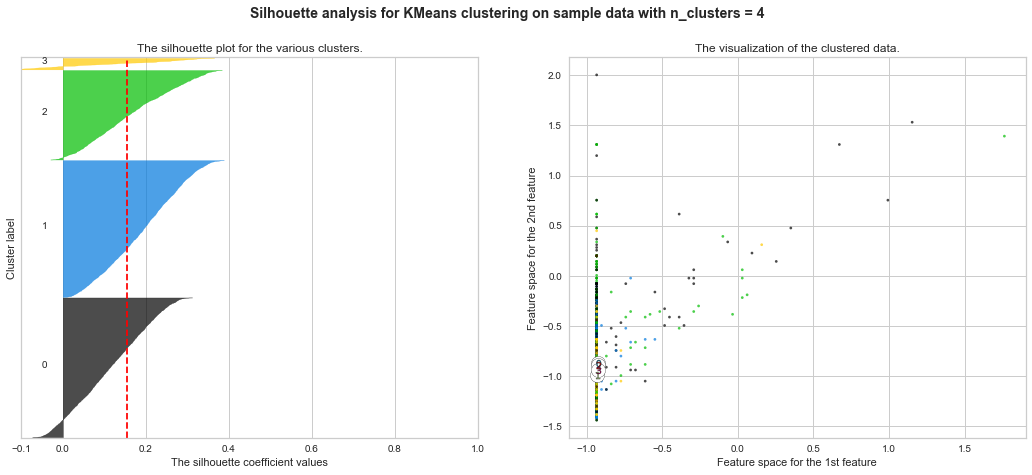

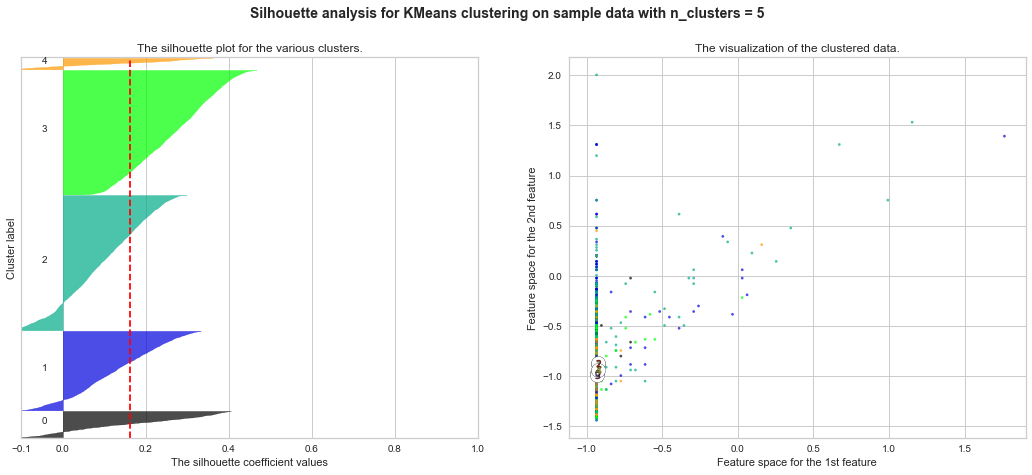

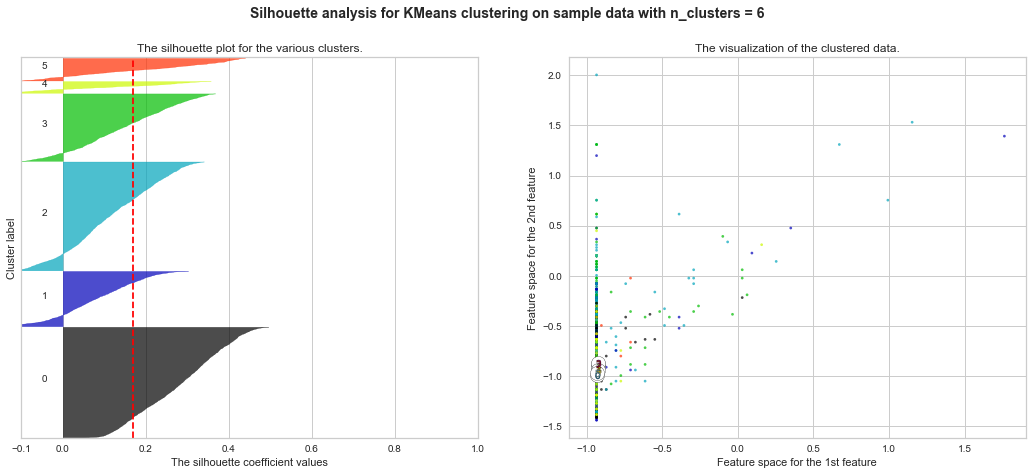

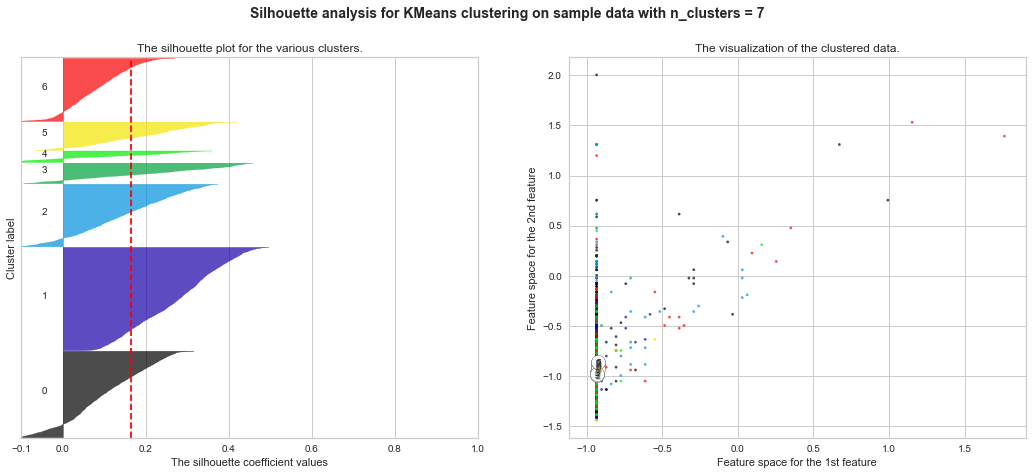

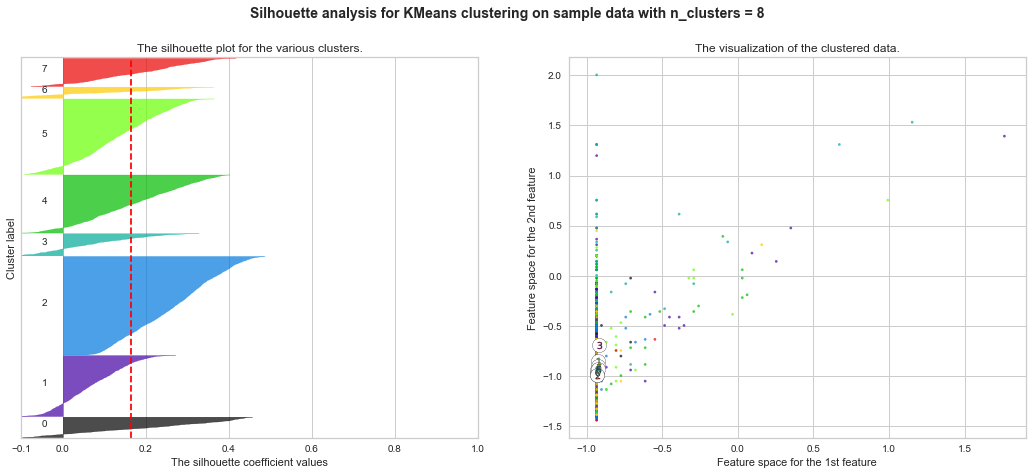

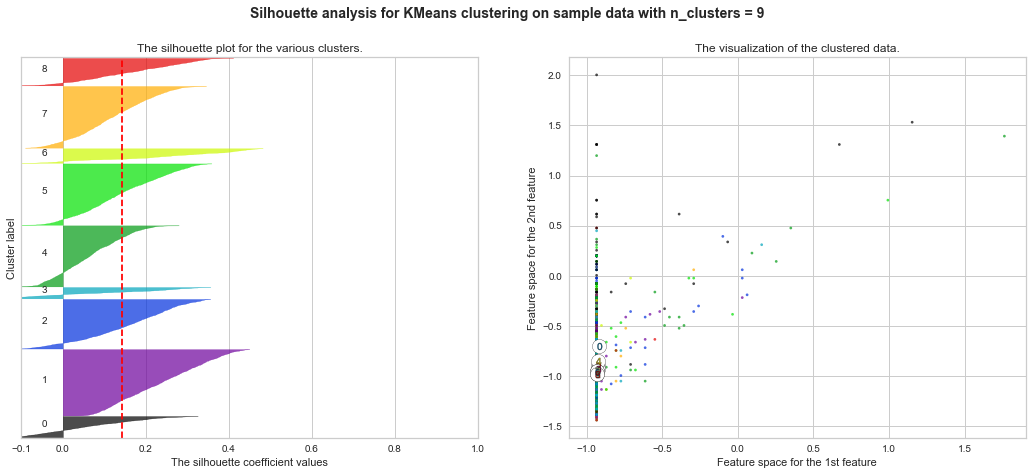

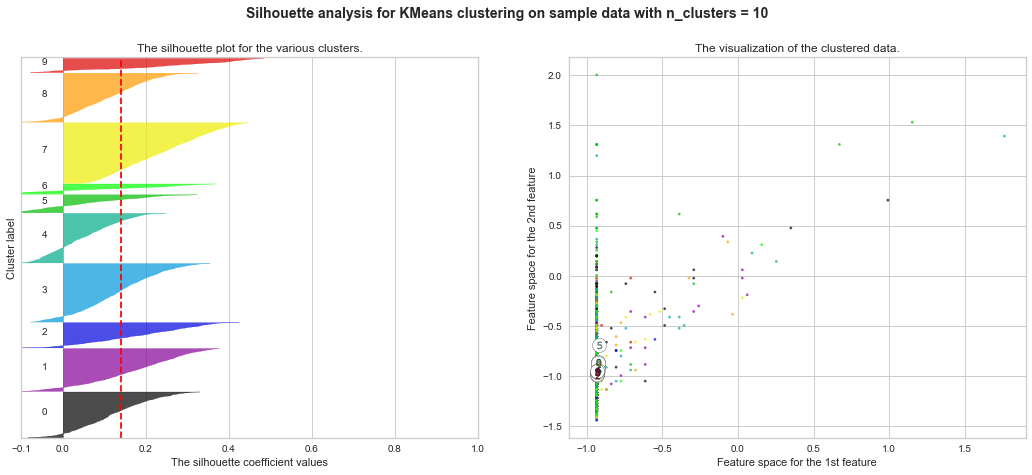

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.values[:, 0], X.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [10]:
for cluster in range(4, 10):
    print(f'Testing k = {cluster}')
    kmeans = KMeans(n_clusters=cluster, init="k-means++")
    kmeans.fit(X)
    data[f'cluster_{cluster}']= kmeans.predict(X)
    

Testing k = 4
Testing k = 5
Testing k = 6
Testing k = 7
Testing k = 8
Testing k = 9


In [11]:
#data.to_csv('clustering_regosols.csv', index=False)
#data.to_csv('clustering_with_class.csv', index=False)